# The Shor Code: 
##  |0> state as input 
Quantum error correction is crucial for quantum computers, here we discuss about the Shor code and the errors simulated using the noise model and demonstrate the simulation results.
The Shor code can be used to correct both the bit-flip and the sign-flip errors using one code.  
In the following code, a custom noise model was built by adding QuantumError to circuit gate.  We domonstrate the measurement result from cases with and without the Shor code.  
For more details please check the qiskit tutorial: https://qiskit.org/documentation/apidoc/aer_noise.html

In [1]:
# Import libraries for use
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import random_state, array_to_latex
from qiskit.test.mock import FakeVigo
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

In [2]:
## SETUP
# Protocol uses 9 qubits and 1 classical bit in a register
qr = QuantumRegister(9, name="q")    # Protocol uses 9 qubits
cr = ClassicalRegister(1, name="cr") # and 1 classical bit cr
shor = QuantumCircuit(qr, cr)

In [3]:
def encoding(qc, q0, q1, q2, q3, q4, q5, q6, q7, q8):
    """Creates encoding process using 9 qubits"""
    qc.cx(q0,q3) # CNOT with q3 as control and q0 as target (Use q1 to control q0.)
    qc.cx(q0,q6) # CNOT with q6 as control and q0 as target
    qc.h(q0)
    qc.h(q3)
    qc.h(q6)
    qc.cx(q0,q1) 
    qc.cx(q0,q2) 
    qc.cx(q3,q4) 
    qc.cx(q3,q5)
    qc.cx(q6,q7) 
    qc.cx(q6,q8)

In [4]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [5]:
def decoding(qc, q0, q1, q2, q3, q4, q5, q6, q7, q8):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) 
    qc.cx(q0,q2)  
    qc.cx(q3,q4) 
    qc.cx(q3,q5)
    qc.cx(q6,q7) 
    qc.cx(q6,q8)
    qc.ccx(q2,q1,q0)
    qc.ccx(q5,q4,q3)
    qc.ccx(q8,q7,q6)

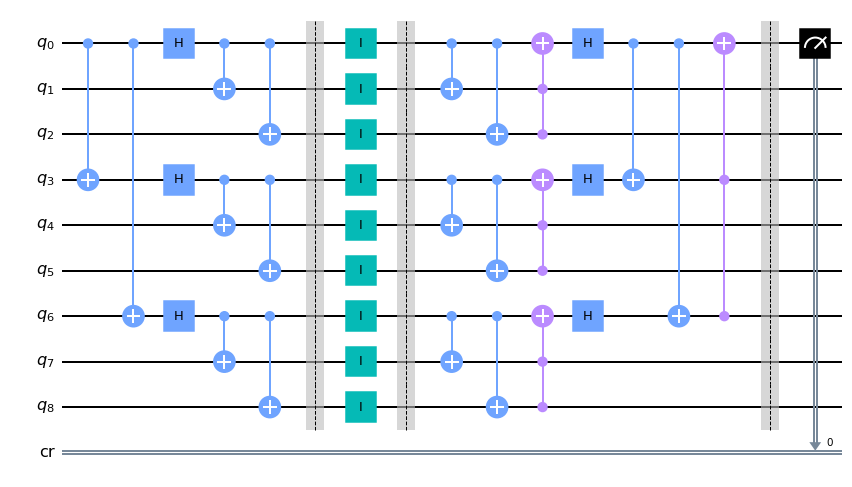

In [6]:
# Let's apply the process above to our circuit:

# Error probabilities
prob_amp = 0.1  # The probability that an amplitude error occurs.
prob_phase = 0.1 # The probability that an phase error occurs.

# Return a single-qubit combined phase and amplitude damping quantum error channel.
error = noise.phase_amplitude_damping_error(prob_amp, prob_phase, 1) # 1 means there's excited_state_population

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['id']) # apply error on the i gate

# Get basis gates from noise model
basis_gates = noise_model.basis_gates


# step 1. encoding
encoding(shor, 0,1,2,3,4,5,6,7,8)

# # step 2. error simulation
shor.barrier()
for i in range(9):  
    shor.i(i)   
shor.barrier()

# # step 3. decoding
decoding(shor, 0,1,2,3,4,5,6,7,8)
shor.h(0)
shor.h(3)
shor.h(6)
shor.cx(0,3) # CNOT with q0 as control and q3 as target
shor.cx(0,6) # CNOT with q0 as control and q6 as target
shor.ccx(6,3,0)

# # step 4. measurement
measure(shor, 0, 0)

# View the circuit:
%matplotlib inline
shor.draw(output='mpl')

# Measurement result
The result shows that the probability of $\left|0\right\rangle$ state remaining the same as the input at the output.
The probability of $\left|0\right\rangle$ state from the measurement is higher with the Shor code compared to the measurement result in the case without the Shor code.

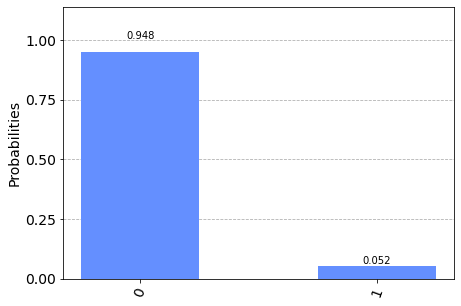

In [7]:
# Perform a noise simulation
result = execute(shor, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

# Case without the Shor code
Here we build a simple model using the error simulator to compare the measurement result with the circuit built with the Shor code.

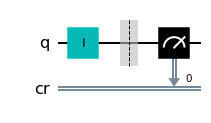

In [8]:
qr = QuantumRegister(1, name="q")    
cr = ClassicalRegister(1, name="cr") 
No_correction = QuantumCircuit(qr, cr)

No_correction.i(0)
measure(No_correction, 0, 0)

# View the circuit:
%matplotlib inline
No_correction.draw(output='mpl')

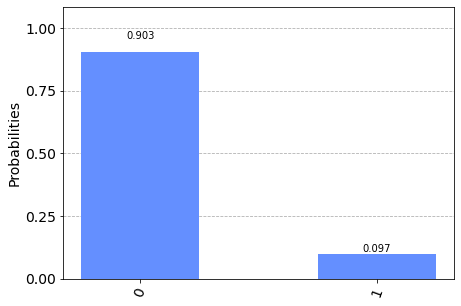

In [9]:
result = execute(No_correction, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

# Conclusion
From the measurement results, the probability of |0> state measured at the output is higher with the Shor code. And hence the Shor code can correct both the bit-flip and the sign-flip errors. 